In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('file:///C:/Users/Aishwarya/Desktop/Datasets/emp_data.csv')
data.head()

,Salary_hike,Churn_out_rate
0,1580,92
1,1600,85
2,1610,80
3,1640,75
4,1660,72


In [3]:
x = data['Salary_hike']
y = data['Churn_out_rate']

Text(0, 0.5, 'Churn out Rate')

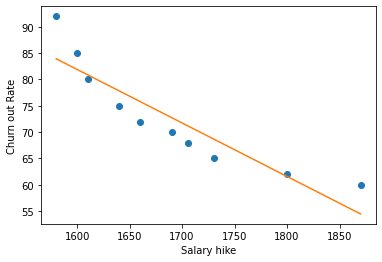

In [4]:
b,m = polyfit(x,y,1)
plt.scatter(x,y)
plt.plot(x,y, '.')
plt.plot(x, b+m*x, '-')
plt.xlabel("Salary hike")
plt.ylabel('Churn out Rate')

- Correlation check

In [5]:
corr = np.corrcoef(x,y)
corr

array([[ 1.        , -0.91172162],
       [-0.91172162,  1.        ]])

# Model building

In [6]:
model = sm.OLS(y,x).fit()
predicted_model = model.predict(x)
model.summary()

C:\Users\Aishwarya\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Churn_out_rate   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.964
Method:                 Least Squares   F-statistic:                              268.5
Date:                Thu, 03 Dec 2020   Prob (F-statistic):                    5.22e-08
Time:                        16:26:13   Log-Likelihood:                         -40.025
No. Observations:                  10   AIC:                                      82.05
Df Residuals:                       9   BIC:                                      82.35
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Salary_hike     0.0428      0.003     16.387      0.000       0.037       0.049
==============================================================================
Omnibus:                        0.253   Durbin-Watson:                   0.137
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.403
Skew:                           0.209   Prob(JB):                        0.818
Kurtosis:                       2.111   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Log Transformation of X

In [7]:
lg_x = np.log(data['Salary_hike'])

In [8]:
model = sm.OLS(y, lg_x).fit()
predicted_model = model.predict(lg_x)

In [9]:
model.summary()

C:\Users\Aishwarya\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Churn_out_rate   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              459.6
Date:                Thu, 03 Dec 2020   Prob (F-statistic):                    4.92e-09
Time:                        16:27:50   Log-Likelihood:                         -37.406
No. Observations:                  10   AIC:                                      76.81
Df Residuals:                       9   BIC:                                      77.11
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Salary_hike     9.8024      0.457     21.438      0.000       8.768      10.837
==============================================================================
Omnibus:                        0.783   Durbin-Watson:                   0.143
Prob(Omnibus):                  0.676   Jarque-Bera (JB):                0.652
Skew:                           0.493   Prob(JB):                        0.722
Kurtosis:                       2.231   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Log Transformation of Y

In [10]:
lg_y = np.log(data['Churn_out_rate'])

In [12]:
model = sm.OLS(lg_y,x).fit()
predicted_model= model.predict(x)
model.summary()

C:\Users\Aishwarya\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Churn_out_rate   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              1369.
Date:                Thu, 03 Dec 2020   Prob (F-statistic):                    3.82e-11
Time:                        16:30:23   Log-Likelihood:                         -3.5804
No. Observations:                  10   AIC:                                      9.161
Df Residuals:                       9   BIC:                                      9.463
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Salary_hike     0.0025   6.82e-05     36.994      0.000       0.002       0.003
==============================================================================
Omnibus:                        0.382   Durbin-Watson:                   0.144
Prob(Omnibus):                  0.826   Jarque-Bera (JB):                0.455
Skew:                          -0.324   Prob(JB):                        0.796
Kurtosis:                       2.180   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Log transformation of both X and Y

In [13]:
model = sm.OLS(lg_y,lg_x).fit()
predicted_model= model.predict(lg_x)

In [14]:
model.summary()

C:\Users\Aishwarya\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Churn_out_rate   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              6563.
Date:                Thu, 03 Dec 2020   Prob (F-statistic):                    3.37e-14
Time:                        16:31:46   Log-Likelihood:                          4.2320
No. Observations:                  10   AIC:                                     -6.464
Df Residuals:                       9   BIC:                                     -6.161
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Salary_hike     0.5759      0.007     81.012      0.000       0.560       0.592
==============================================================================
Omnibus:                        0.309   Durbin-Watson:                   0.131
Prob(Omnibus):                  0.857   Jarque-Bera (JB):                0.434
Skew:                           0.181   Prob(JB):                        0.805
Kurtosis:                       2.046   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- We can use the log transformation of both X and Y as it gives the best R squared value(0.999).